# FOSS4G for Geospatial Analysis
## Introduction
ArcGIS has been a staple in mapping and geospatial analysis world. But we have much more options than just ArcGIS for that purpose. 
**QuantumGIS (QGIS)** has been been providing a good open source alternative to ArcGIS. It provides both feature-rich mapping options and strong low-level geospatial analysis capabilities. Here, we will introudce some free and open source tools for executing geospatial operations. 

Python provides multiple APIs for geospatial analysis. 

In [67]:
# Set up our workspace
% matplotlib inline
import os
from pprint import pprint
from matplotlib import pyplot as plt

basedir = os.getcwd()

## GDAL/OGR 
GDAL stands for [Geospatial Data Abstraction Library](http://www.gdal.org/), and is developed by Open Source Geospatial Foundation (). It has the capacity to read various vector and raster data formats. It consists of various libraries, written in C++ and distributed as free software. Various softwares and programming language provide APIs to carry out geospatial analysis using GDAL/OGR. 

### Using GDAL to veiw  Raster metadata
Details of the function *gdalinfo* can be found in http://www.gdal.org/gdalinfo.html. 

In [2]:
%%bash
pwd
cd ./gdal_mask/raster
gdalinfo -norat -noct *.tif

/home/serenewizard/foss
Driver: GTiff/GeoTIFF
Files: wshed_5597000_mask.tif
Size is 1772, 2333
Coordinate System is:
PROJCS["Albers_Conical_Equal_Area",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.2572221010042,
                AUTHORITY["EPSG","7019"]],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (587020.808808299363591,1741078.109686628216878)
Pixel Size = (29.998935288175641,-29.994843750703179)
Metadata:
  AREA_OR_POINT=Area
  DataType=Thematic
Image Structure Metadata:
  INTERLEA

### Using OGR to view Vector Metadata
Details of the function *ogrinfo* can be found in http://www.gdal.org/ogrinfo.html. 

In [3]:
%%bash
pwd
cd ./gdal_mask/vector
ogrinfo -al -so wshed_3380500.shp

/home/serenewizard/foss
INFO: Open of `wshed_3380500.shp'
      using driver `ESRI Shapefile' successful.

Layer name: wshed_3380500
Metadata:
  DBF_DATE_LAST_UPDATE=2017-09-01
Geometry: Polygon
Feature Count: 1
Extent: (334165.643546, 4242975.000000) - (366415.643546, 4296765.000000)
Layer SRS WKT:
PROJCS["NAD_1927_UTM_Zone_16N",
    GEOGCS["GCS_North_American_1927",
        DATUM["North_American_Datum_1927",
            SPHEROID["Clarke_1866",6378206.4,294.9786982]],
        PRIMEM["Greenwich",0.0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["false_easting",500000.0],
    PARAMETER["false_northing",0.0],
    PARAMETER["central_meridian",-87.0],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["latitude_of_origin",0.0],
    UNIT["Meter",1.0]]
ID: Integer64 (10.0)
GRIDCODE: Integer64 (10.0)
Area: Real (19.11)
Land_Use: String (80.0)


## <font color=green> Geopandas </font> library in Python
**Geopandas** is used to create, read, write and manipulate the vector data. This library is an extension of pandas (a data analysis) library, where the spatial information is stored in the <font color=blue> **geometry** </font> column. Each feature of the shapefile is represented by the dataframe row. 

In [4]:
import geopandas as gpd

vectorpath = os.path.join(basedir, "gdal_mask", "vector", "wshed_3380500.shp")
src = gpd.read_file(vectorpath)

In [5]:
# Get the Shapefile VAT table as geopandas dataframe
src

,Area,GRIDCODE,ID,Land_Use,geometry
0,1180.7037,3380500,2,"41(28), 81(25), 82(37)","POLYGON ((343165.6435455771 4293645, 343195.64..."


In [6]:
# Get the coordinate reference system of the dataframe
src.crs

{'init': 'epsg:26716'}

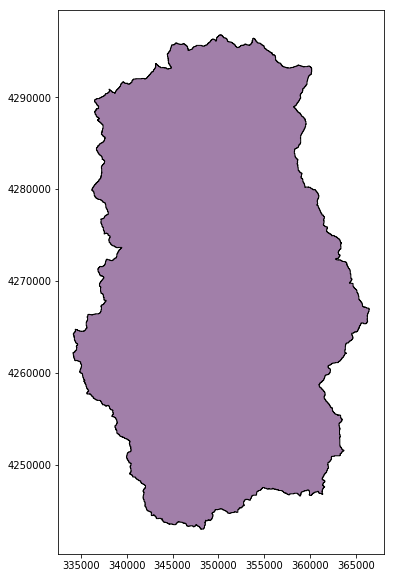

In [66]:
# Plot the features of the shapefile
plots = src.plot(figsize=(10,10))

## <font color= green> Fiona </font> library in Python
**Fiona** is another library that is used to create, read, write and manipulate the vector data. Fiona provides an API to the the underlying OGR library.

In [7]:
import fiona

vectorpath = os.path.join(basedir, "gdal_mask", "vector", "wshed_3380500.shp")
vect_src = fiona.open(vectorpath)

In [8]:
# Metadata of the shapefile
vect_src.meta

{'crs': {'init': 'epsg:26716'},
 'crs_wkt': 'PROJCS["NAD_1927_UTM_Zone_16N",GEOGCS["GCS_North_American_1927",DATUM["North_American_Datum_1927",SPHEROID["Clarke_1866",6378206.4,294.9786982]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4267"]],PROJECTION["Transverse_Mercator"],PARAMETER["false_easting",500000.0],PARAMETER["false_northing",0.0],PARAMETER["central_meridian",-87.0],PARAMETER["scale_factor",0.9996],PARAMETER["latitude_of_origin",0.0],UNIT["Meter",1.0],AUTHORITY["EPSG","26716"]]',
 'driver': 'ESRI Shapefile',
 'schema': {'geometry': 'Polygon',
  'properties': OrderedDict([('ID', 'int:10'),
               ('GRIDCODE', 'int:10'),
               ('Area', 'float:19.11'),
               ('Land_Use', 'str:80')])}}

In [9]:
# Driver of the shapefile
vect_src.driver

'ESRI Shapefile'

In [10]:
#Schema of the shapefile
pprint(vect_src.schema)

{'geometry': 'Polygon',
 'properties': OrderedDict([('ID', 'int:10'),
                            ('GRIDCODE', 'int:10'),
                            ('Area', 'float:19.11'),
                            ('Land_Use', 'str:80')])}


In [11]:
#CRS of the shapefile
vect_src.crs

{'init': 'epsg:26716'}

In [12]:
# Number of features in the shapefile
len(list(vect_src))

1

In [13]:
# The extent of the shapefile
vect_src.bounds

(334165.64354557707, 4242975.0, 366415.64354557707, 4296765.0)

In [14]:
# Get the first feature of the shapefile
for feature in vect_src:
    pprint(feature.keys())

dict_keys(['properties', 'type', 'geometry', 'id'])


In [15]:
# Get the properties of the first feature
pprint(feature['properties'])

OrderedDict([('ID', 2),
             ('GRIDCODE', 3380500),
             ('Area', 1180.7037),
             ('Land_Use', '41(28), 81(25), 82(37)')])


In [16]:
# Get the geometry of the first feature
#pprint(feature['geometry'])

Note: You need to close the file after you are done with it. 

In [17]:
vect_src.close()

## <font color= green> Rasterio </font> library in Python

In [18]:
import rasterio

rasterpath = os.path.join(basedir, "gdal_mask", "raster", "wshed_5597000_mask.tif")
rast_src = rasterio.open(rasterpath)

In [19]:
# Metadata of the raster file
rast_src.meta

{'affine': Affine(29.99893528817564, 0.0, 587020.8088082994,
       0.0, -29.99484375070318, 1741078.1096866282),
 'count': 1,
 'crs': CRS({'lon_0': -96, 'lat_0': 23, 'x_0': 0, 'units': 'm', 'proj': 'aea', 'lat_1': 29.5, 'datum': 'NAD83', 'y_0': 0, 'lat_2': 45.5, 'no_defs': True}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 2333,
 'nodata': 255.0,
 'transform': (587020.8088082994,
  29.99893528817564,
  0.0,
  1741078.1096866282,
  0.0,
  -29.99484375070318),
 'width': 1772}

In [20]:
# Driver of the raster
rast_src.driver

'GTiff'

In [21]:
# CRS of the raster
rast_src.get_crs()

CRS({'lon_0': -96, 'lat_0': 23, 'x_0': 0, 'units': 'm', 'proj': 'aea', 'lat_1': 29.5, 'datum': 'NAD83', 'y_0': 0, 'lat_2': 45.5, 'no_defs': True})

In [22]:
# Affine of the raster
pprint(rast_src.affine)

Affine(29.99893528817564, 0.0, 587020.8088082994,
       0.0, -29.99484375070318, 1741078.1096866282)


In [23]:
# Number of bands in the raster
rast_src.count

1

In [24]:
# The extent of the raster
pprint(rast_src.bounds)

BoundingBox(left=587020.8088082994, bottom=1671100.1392162377, right=640178.9221389466, top=1741078.1096866282)


In [25]:
# Shape of the raster
rast_src.shape

(2333, 1772)

In [26]:
# Value representing no data in raster
rast_src.nodatavals

(255.0,)

In [27]:
# Resolution of the raster
rast_src.res

(29.99893528817564, 29.99484375070318)

In [28]:
# Read the data from the first band
band = rast_src.read(1)
band.view()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

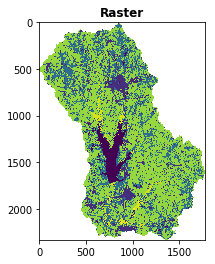

In [56]:
# Visualize the raster band
from rasterio.plot import show
show(rast_src, title="Raster", cmap='viridis')

In [41]:
help(show)

Help on function show in module rasterio.plot:

show(source, with_bounds=True, contour=False, contour_label_kws=None, ax=None, title=None, **kwargs)
    Display a raster or raster band using matplotlib.
    
    Parameters
    ----------
    source : array-like in raster axis order,
        or (raster dataset, bidx) tuple,
        or raster dataset,
        If the tuple (raster dataset, bidx),
        selects band `bidx` from raster.  If raster dataset display the rgb image
        as defined in the colorinterp metadata, or default to first band.
    with_bounds : bool (opt)
        Whether to change the image extent to the spatial bounds of the image,
        rather than pixel coordinates. Only works when source is
        (raster dataset, bidx) or raster dataset.
    contour : bool (opt)
        Whether to plot the raster data as contours
    contour_label_kws : dictionary (opt)
        Keyword arguments for labeling the contours,
        empty dictionary for no labels.
    ax : matp

Make sure you close the raster file at the end of the operation

In [57]:
rast_src.close()